In [2]:
Problem Statement :- predicting whether a employee will purchase 
    the company’s newly launched product or not.

# user/customer
# company / organization
# product launch
# purchase or not purchase?
#---> its a classification problem

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
df = pd.read_excel("LogisticsAlgorithm.xlsx")

In [5]:
df.head()

,UserID,Gender,Age,EstimatedSalary,Purchased
0,1,Male,19,19000,0
1,2,Male,26,20000,0
2,3,Female,35,32000,0
3,4,Female,27,29000,0
4,5,Male,32,23000,0


In [6]:
newdf = df #Doing the Backup

In [7]:
newdf.head()

,UserID,Gender,Age,EstimatedSalary,Purchased
0,1,Male,19,19000,0
1,2,Male,26,20000,0
2,3,Female,35,32000,0
3,4,Female,27,29000,0
4,5,Male,32,23000,0


In [8]:
newdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   UserID           25 non-null     int64 
 1   Gender           25 non-null     object
 2   Age              25 non-null     int64 
 3   EstimatedSalary  25 non-null     int64 
 4   Purchased        25 non-null     int64 
dtypes: int64(4), object(1)
memory usage: 1.1+ KB


In [9]:
newdf.describe()

,UserID,Age,EstimatedSalary,Purchased
count,25.000000,25.000000,25.000000,25.00000
mean,13.000000,30.440000,38316.000000,0.24000
std,7.359801,7.676154,12654.896286,0.43589
min,1.000000,19.000000,19000.000000,0.00000
25%,7.000000,26.000000,31500.000000,0.00000
50%,13.000000,31.000000,36000.000000,0.00000
75%,19.000000,34.000000,45000.000000,0.00000
max,25.000000,54.000000,80000.000000,1.00000


In [10]:
# input
x = newdf.iloc[:, [2, 3]].values
#we are considering only Age and Expected salary
# output
y = newdf.iloc[:, 4].values
#Purchased column is out output...

In [11]:
print(x)

[[   19 19000]
 [   26 20000]
 [   35 32000]
 [   27 29000]
 [   32 23000]
 [   34 39000]
 [   54 80000]
 [   34 33000]
 [   29 36000]
 [   32 52000]
 [   38 43000]
 [   37 45000]
 [   31 49000]
 [   19 31500]
 [   26 25400]
 [   22 36000]
 [   24 37000]
 [   22 42000]
 [   29 46000]
 [   21 31000]
 [   34 33000]
 [   29 36000]
 [   32 52000]
 [   38 43000]
 [   37 45000]]


In [12]:
print(y)

[0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 1 0 0 0 1 1 1]


In [13]:
from sklearn.model_selection import train_test_split

xtrain, xtest, ytrain, ytest = train_test_split(
	x, y, test_size=0.25, random_state=0)
#Splitting The Dataset: Train and Test dataset
#Traing data is = 75%
#Testing data is = 25%

In [14]:
from sklearn.preprocessing import StandardScaler

sc_x = StandardScaler()
xtrain = sc_x.fit_transform(xtrain)
xtest = sc_x.transform(xtest)

print (xtrain[0:10, :])
# -1 to 0 to +1

[[ 0.77136498  0.51854745]
 [ 0.89758834  0.37506007]
 [-0.61709198 -0.88762888]
 [-0.61709198 -1.2750448 ]
 [ 0.89758834  0.37506007]
 [-1.50065551 -0.44999237]
 [-0.2384219  -0.12714576]
 [ 2.91716211  3.0295766 ]
 [-0.2384219   0.59029114]
 [ 0.14024818 -1.05981373]]


In [15]:
from sklearn.linear_model import LogisticRegression

classifier = LogisticRegression(random_state = 0)
classifier.fit(xtrain, ytrain) # 75 #training


LogisticRegression(random_state=0)

In [16]:
y_pred = classifier.predict(xtest)


In [17]:
print(y_pred)

[0 0 0 0 0 0 0]


In [146]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(ytest, y_pred)
print ("Confusion Matrix : \n", cm)


Confusion Matrix : 
 [[6 0]
 [1 0]]


In [18]:
#True Positive + True Negative = 6 + 0 ---> cross diagonal values
#False Positive + False Negative = 1 + 0 ---> cross diagonal values
#Performance measure – Accuracy 

In [19]:
from sklearn.metrics import accuracy_score

print ("Accuracy : ", accuracy_score(ytest, y_pred))


Accuracy :  0.8571428571428571


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


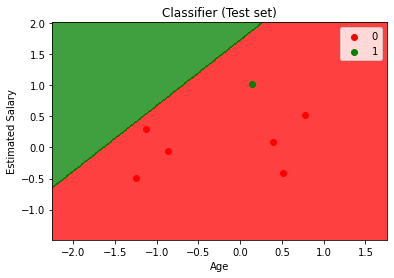

In [20]:
from matplotlib.colors import ListedColormap

X_set, y_set = xtest, ytest
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1,
							stop = X_set[:, 0].max() + 1, step = 0.01),
					np.arange(start = X_set[:, 1].min() - 1,
							stop = X_set[:, 1].max() + 1, step = 0.01))

plt.contourf(X1, X2, classifier.predict(
			np.array([X1.ravel(), X2.ravel()]).T).reshape(
			X1.shape), alpha = 0.75, cmap = ListedColormap(('red', 'green')))

plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())

for i, j in enumerate(np.unique(y_set)):
	plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
				c = ListedColormap(('red', 'green'))(i), label = j)
	
plt.title('Classifier (Test set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()
